# Lecture 3: Visualization

## Outline for Lecture 3.2

* Plotting with Matplotlib
    * Plotting basics review and extension
        - plot()
            - can use lists or arrays
            - format strings ('b--', 'g^', etc.)
            - automatically creates a figure if one doesn't exist
                - otherwise makes new 'axes' on active figure
        - figure()
            - used to make new figure and make existing ones active
                - e.g., figure(2) creates Figure 2, or makes Figure 2 active if it already exists.
        - subplot() and add_subplot()
            - for making subplots and adding subplots to figures
            - basic example of working with axes objects
                - (important, because most gallery examples make plots by using methods of axes objects)
                - adding plots to them
                - drawing things on them
                - getting and setting limits
        - matplotlib documentation and gallery
        
(If there's enough time)

                
   

## Plotting with Matplotlib

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

We will go over only a few examples. Documentation and examples are available at https://matplotlib.org/ . In particular, my favorite -- examples: https://matplotlib.org/gallery/ (make sure to cite in your code)

Let's look at an example

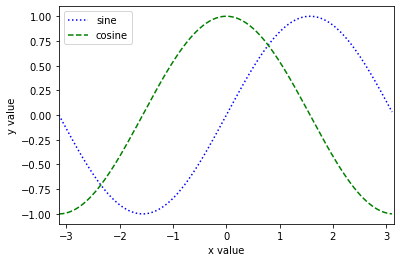

In [33]:
from pylab import * # import all functions from numpy and matplotlib. Beware ! Overloads functions like sqrt, sin

# make plots inline (so that the plots appear). This is the default for datahub, but useful to keep for compatibility
%matplotlib inline

x = arange(-pi, pi, pi/100)   # create an array of x values
plot(x, sin(x), 'b:', label='sine' )   # plot sin(x) in a blue, dotted line
plot(x, cos(x), 'g--', label='cosine' ) # plot cos(x) in a green, dashed line
xlabel('x value' )
ylabel('y value' )
xlim(-pi, pi)
#ylim(-10, 10)
legend(loc='best')
show()

Actually, plot is a very flexible command. Arguments can any sequential data types (e.g. lists), although internally they are converted into arrays. Attributes can be set on the command line or separately (see below). 

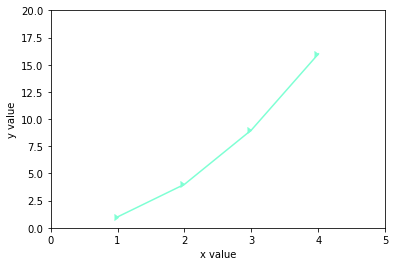

In [34]:
plot([1,2,3,4], [1,4,9,16], marker=5, color='aquamarine')
axis([0, 5, 0, 20])
xlabel('x value' )
ylabel('y value' )
show()

### Line attributes

![Line styles](linestyles.png)


### Colors

Huge range of colors in python! Here is the full table, but you can also just start with the base colors: b, g, r, c, m, y, k, w

![Colors](colors.png)

See PDF version for better resolution.

### Markers

![Filled markers](filledmarkers.png)
![Unfilled markers](unfilledmarkers.png)

See (http://matplotlib.org/) for more details

### Plots and subplots

Subplots are very useful when you want to draw more than one plot at the same time. Let's start by drawing two plots in the same cell (but things will quickly get quite a bit more complicated!)

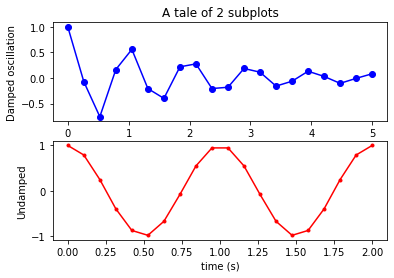

In [35]:
import numpy as np                 # notice import with named namespace: better practice 
import matplotlib.pyplot as plt    # notice import with named namespace: better practice 

x1 = np.linspace(0.0, 5.0, 20) #what happens if I don't specify the number of points
x2 = np.linspace(0.0, 2.0, 20)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1/2)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1) # subplot(nrows, ncols, index, **kwargs)
plt.plot(x1, y1, color='blue', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Now let's explore a few different ways to use subplots()

#### A figure and a single subplot

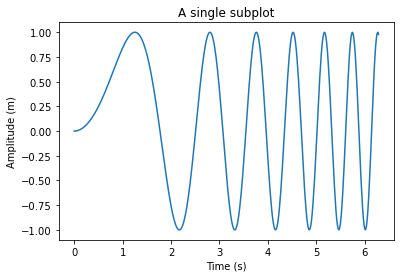

In [36]:
import matplotlib.pyplot as plt 
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Just a figure and one subplot
f, ax = plt.subplots() #f is the figure; a is the axis
ax.plot(x, y)
ax.set_title('A single subplot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()


#### Two subplots that share the x-axis

Text(0.5, 0, 'time (s)')

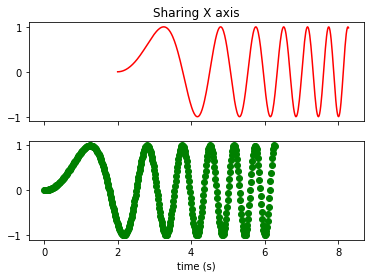

In [37]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x+2, y,'r')
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y, color='g')
axarr[1].set_xlabel('time (s)')

#### Two subplots that share the y-axis

Text(0.5, 0, 'time (s)')

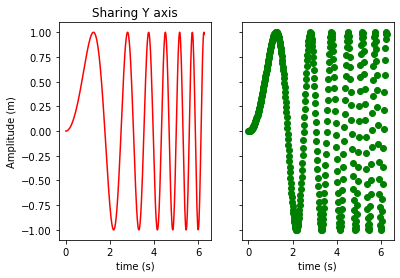

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing Y axis')
ax1.set_ylabel('Amplitude (m)')
ax1.set_xlabel('time (s)')
ax2.scatter(x, y, color='g')
ax2.set_xlabel('time (s)')

#### Three subplots sharing both x/y axes

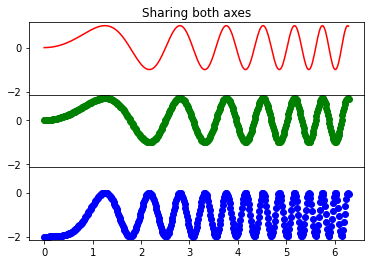

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(3,sharex=True,sharey=True)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing both axes')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
foo = plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


#### Four subplots; sharing x and y axes in each row

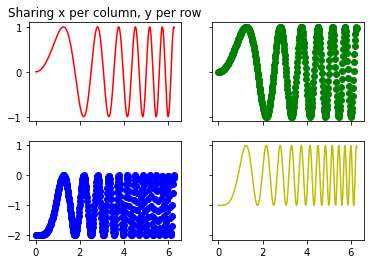

In [21]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'r')
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
ax4.plot(x, 2 * y ** 2 - 1, 'y')


For (even more!) details see the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

### Histogramming 

Histograms are different to graphs because they store the data in bins. Histograms are used extensively in data analysis. We'll see them again in the lecture on statistics.

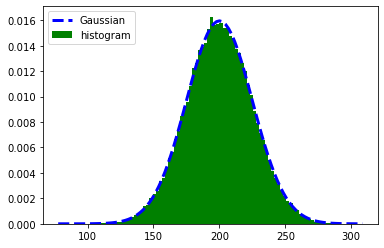

In [29]:
from pylab import *
from scipy.stats import norm # a new libary -- more advanced scientific programming

mu = 200
sigma = 25
x = mu + sigma*randn(100000)

val, bins, patches = hist(x, 100, density=True, color='g', label='histogram')
#print(bins)
lines = plot(bins, norm.pdf(bins, mu, sigma), 'b--',  linewidth=3, label='Gaussian')
legend(loc='upper left')
#legend([lines[0], patches[0]], ['Gaussian', 'hist'])

Now let's have a look at what the different histtype settings do.

[116.16661151 125.21866107 134.27071063 143.3227602  152.37480976
 161.42685932 170.47890888 179.53095845 188.58300801 197.63505757
 206.68710714 215.7391567  224.79120626 233.84325583 242.89530539
 251.94735495 260.99940452 270.05145408 279.10350364 288.15555321
 297.20760277]


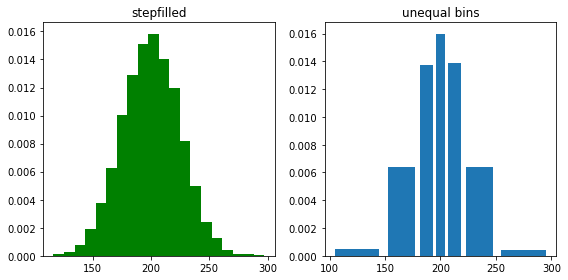

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# construct a histogram based on a Gaussian with mu=200 and sigma=25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4)) # first the width, then the height

val, bins, patches = ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g') #stepfilled is the default
ax0.set_title('stepfilled')
print(bins)

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

### For fun: 3d plotting

Does anyone know what this function is?

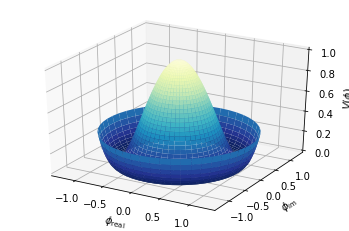

In [32]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

### More information
We will cover plotting in the workshops. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples" -- that's where a lot of this code has come from